# 08과 이변량_숫자 vs 숫자

<img src='https://github.com/DA4BAM/image/blob/main/%EC%9D%B4%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=700/>

## 1.환경준비

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류  
④ 뉴욕 공기 오염도


In [ ]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [ ]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## 2.시작하기 

* 우리가 사용하는 도구는...
    * 두 변수와의 관계를 살펴보기 위해, 두가지 도구(시각화, 수치화)를 이용합니다.
    * 이 도구들도 각각 한계가 있습니다. 보이는게 전부가 아님을 꼭 명심하세요! 
    * 특히 수치화 도구(가설검정 도구)는 많은 가정들이 전제 됩니다. 
    * 그래서 이번 과정에서는 그 도구를 사용하는 데에 집중합니다. 


----

## 2.시각화

* 상관 분석에 대해서 이야기 해봅시다.
    * 상관 분석은 연속형 변수 X에 대한 연속형 변수 Y의 관계를 분석할 때 사용됩니다.
    * Scatter를 통해 시각화 합니다.
* 가설 : 온도(x)가 상승하면 아이스크림 판매량(y)을 증가할까?
    * 어떤 관계가 보이나요?
    * 얼마나 강한 관계인가요?
* 숫자 vs 숫자를 비교할 때 중요한 관점이 **‘직선’ (Linearity)**입니다.



<img src='https://github.com/DA4BAM/image/blob/main/%EC%82%B0%EC%A0%90%EB%8F%84_ex.png?raw=true' width=500/>

### 1) 산점도

* 문법
    * plt.scatter( x축 값, y축 값 )
    * plt.scatter( ‘x변수’, ‘y변수’, data = dataframe이름) 

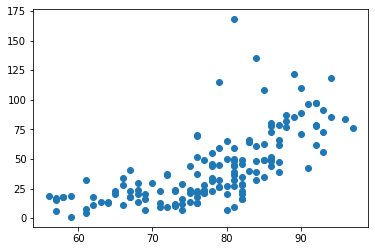

In [ ]:
plt.scatter(air['Temp'], air['Ozone'])
plt.show()

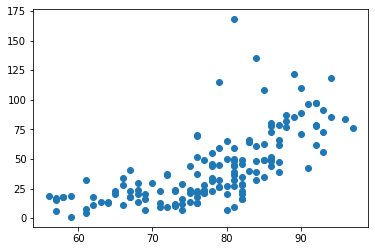

In [ ]:
plt.scatter('Temp', 'Ozone', data = air)
plt.show()

그래프를 그렸으면, 그래프로부터 정보를 파악해야 합니다.  

무엇이 보이나요?

#### 실습 
Temp, Wind, Solar.R 과 Ozone 과의 관계를 시각화 해 봅시다.

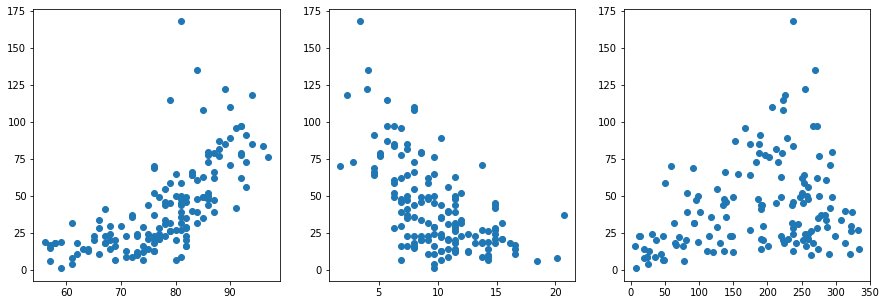

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.scatter('Temp', 'Ozone', data = air)

plt.subplot(1,3,2)
plt.scatter('Wind', 'Ozone', data = air)

plt.subplot(1,3,3)
plt.scatter('Solar.R', 'Ozone', data = air)

plt.show()

Ozone과 가장 강한 관계의 x변수는?

* 두 변수의 관계
    * 산점도에서 또렷한 패턴이 보인다면, 강한 관계로 볼 수 있습니다.
    * 특히, 직선의 패턴이 보인다면

<img src='https://cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width=800/>

### 2) pairplot으로 한꺼번에 시각화 할 수 있습니다.

* 숫자형 변수들에 대한 산점도를 한꺼번에 그려줍니다.
* 그러나 **시간이 많이**걸립니다.

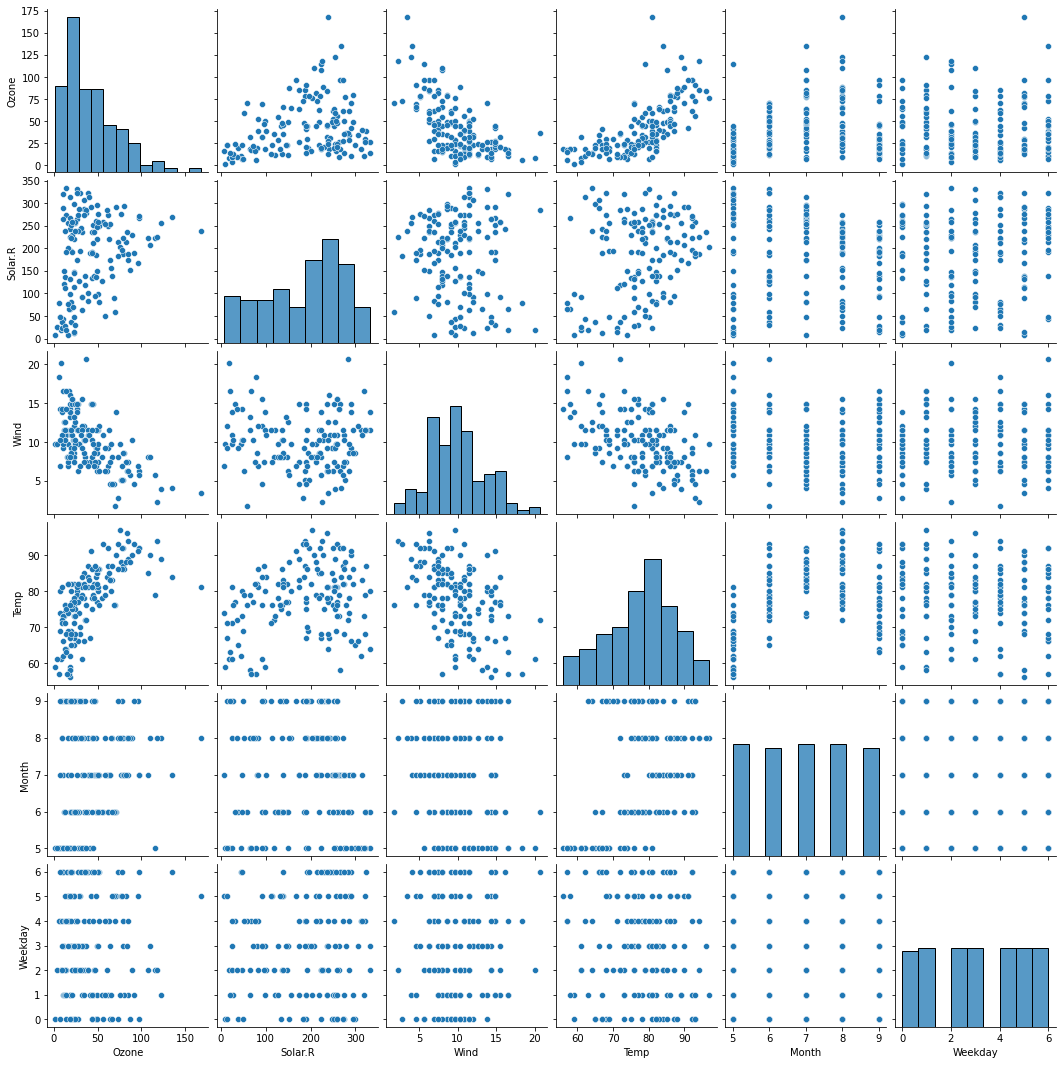

In [ ]:
sns.pairplot(air)

###  3) jointplot 로 살펴보기

* jointplot은 산점도와 각각의 히스토그램을 함께 보여줍니다.

* Temp --> Ozone

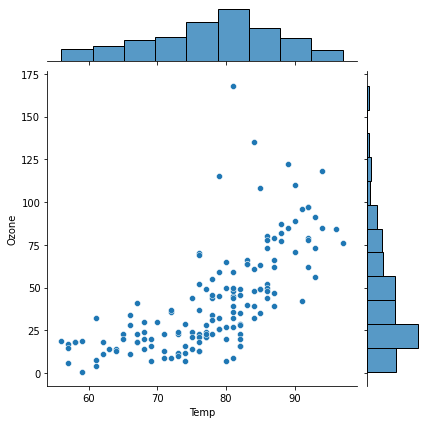

In [ ]:
sns.jointplot(x='Temp', y='Ozone', data = air)
plt.show()

* Wind --> Ozone

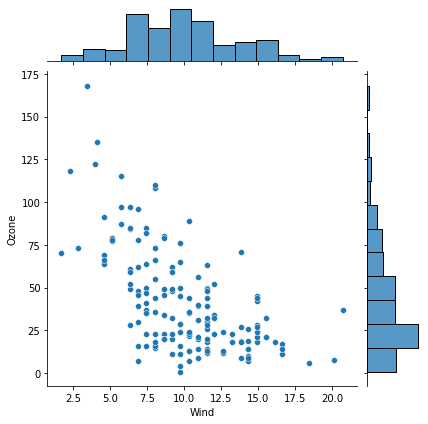

In [ ]:
sns.jointplot(x='Wind', y='Ozone', data = air)
plt.show()

* Solar.R --> Ozone

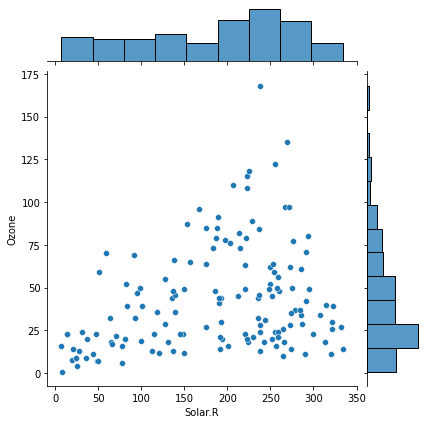

In [ ]:
sns.jointplot(x='Solar.R', y='Ozone', data = air)
plt.show()

우리는 다양한 시각화를 통해서 결국은...

## 3.수치화 : 상관분석

* 상관관계를 나타내는 두가지 숫자 : 공분산, 상관계수
    * 둘 다 얼마나 직선으로 값들이 모여 있는지를 수치화

* 상관계수 공식
    * 분자 부분이 공분산
    * 양의 상관관계, 음의 상관관계가 클 수록 값이 커지고, 작아집니다.

<img src='https://github.com/DA4BAM/image/blob/main/%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98.png?raw=true' width=400/>


* 상관계수 𝑟
    * 공분산을 표준화 한 값
    * -1 ~ 1 사이의 값
    * -1, 1에 가까울 수록 강한 상관관계를 나타냄.

* 경험에 의한 대략의 기준(절대적인 기준이 절대 아닙니다.)
    * 강한 : 0.5 < |𝑟| ≤ 1
    * 중간 : 0.2 < |𝑟| ≤ 0.5
    * 약한 : 0.1 < |𝑟| ≤ 0.2
    * (거의)없음 : |𝑟| ≤ 0.1
    

In [ ]:
import scipy.stats as spst

In [ ]:
# 상관계수와 p-value 
spst.pearsonr(air['Temp'], air['Ozone'])

(0.6833717861490115, 2.197769800200214e-22)

결과는 튜플로 나오는데

1. 튜플의 첫 번째 값 : 상관계수를 뜻합니다.
2. 두번째 값 : p-value
    * 귀무가설 : 상관 관계가 없다.(상관계수가 0이다.)
    * 대립가설 : 상관 관계가 있다.(상관계수가 0이 아니다.)
3. 주의 사항 : 값에 NaN이 있으면 계산되지 않습니다. 반드시 .notnull()로 제외하고 수행해야 합니다.

In [ ]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
air.corr()

,Ozone,Solar.R,Wind,Temp,Month,Weekday
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,-0.012900
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,0.071189
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.037313
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.032574
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,0.030261
Weekday,-0.012900,0.071189,0.037313,-0.032574,0.030261,1.000000


위 결과로 부터,
1. 같은 변수끼리 구한 값 1은 의미 없다.
2. 상관계수의 절대값이 
    * 1에 가까울 수록 강한 상관관계
    * 0에 가까울 수록 약한 상관관계
3. +는 양의 상관관계, -는 음의 상관관계 

* 상관계수를 heatmap으로 시각화 할 수 있습니다.

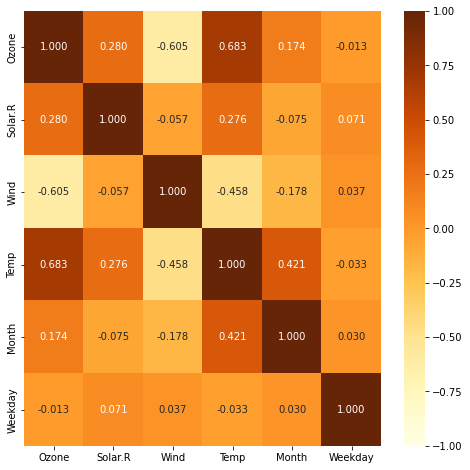

In [ ]:
plt.figure(figsize = (8, 8))
sns.heatmap(air.corr(), annot = True, fmt = '.3f', cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()

칼라를 변경하려면 아래 링크로 가서 color map 을 확인하고 조정하세요.  
cmap(color map) : https://matplotlib.org/stable/tutorials/colors/colormaps.html

### 실습 : 상관계수
air 데이터를 이용합니다.

In [ ]:
air.loc[air['Solar.R'].notnull()]


,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
6,23,299.0,8.6,65,1973-05-07,5,0
...,...,...,...,...,...,...,...
148,30,193.0,6.9,70,1973-09-26,9,2
149,23,145.0,13.2,77,1973-09-27,9,3
150,14,191.0,14.3,75,1973-09-28,9,4
151,18,131.0,8.0,76,1973-09-29,9,5


In [ ]:
# 상관계수를 구해봅시다.
# Temp --> Ozone
print('Temp -> Ozone 상관계수: {}, pvalue : {}'.format(spst.pearsonr(air['Temp'], air['Ozone'])[0],spst.pearsonr(air['Temp'], air['Ozone'])[1]))

# Wind --> Ozone
print('Wind -> Ozone 상관계수: {}, pvalue : {}'.format(spst.pearsonr(air['Wind'], air['Ozone'])[0],spst.pearsonr(air['Wind'], air['Ozone'])[1]))

# Solar.R --> Ozone
air2 = air.loc[air['Solar.R'].notnull()]
print('Solar.R -> Ozone 상관계수: {}, pvalue : {}'.format(spst.pearsonr(air2['Solar.R'], air2['Ozone'])[0],spst.pearsonr(air2['Solar.R'], air2['Ozone'])[1]))

Temp -> Ozone 상관계수: 0.6833717861490115, pvalue : 2.197769800200214e-22
Wind -> Ozone 상관계수: -0.6054782354684075, pvalue : 1.1255146087638192e-16
Solar.R -> Ozone 상관계수: 0.28006813349053766, pvalue : 0.0006175878788566531


In [ ]:
# 차트로 보는 것과 상관계수로 비교하는 것에 차이가 있나요?



In [ ]:
# Solar.R --> Ozone  
# air2 = air['Solar.R'].notnull() 
# 조건문 : 결과는 True, False
# air['Solar.R'] > 50
# print(air2)
air2 = air[air['Solar.R'].notnull()]
# air.loc[air['Solar.R'].notnull()]
print(spst.pearsonr(air2['Solar.R'],air2['Ozone'])) 

# # Solar.R --> Ozone
# air2 = air.loc[air['Solar.R'].notnull()]
# print(spst.pearsonr(air2['Solar.R'],air2['Ozone'])) 

(0.28006813349053766, 0.0006175878788566531)


##4.상관계수의 한계


* 상관계수에는 한계가 있습니다.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png' width=800/>


* Data Saurus

<img src='https://damassets.autodesk.net/content/dam/autodesk/research/publications-assets/gifs/same-stats-different-graphs/DinoSequentialSmaller.gif
' width=800/>

In [ ]:
ds = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/datasaurus.csv")

In [ ]:
ds_names = ['dino','x_shape', 'star', 'circle', 'bullseye' ]

* 아래 5개 그룹의 수치화 결과(상관계수)를 보고 x와 y에 관계가 있는지 판단해 봅시다.

In [ ]:
for i, d in enumerate(ds_names) :
    temp_ds = ds.loc[ds['dataset']==d]
    corr = spst.pearsonr(temp_ds['x'], temp_ds['y'])
    print(i)
    print('상관계수 : {:.4f},  P-value : {:.4f}'.format(corr[0], corr[1]))
    print('---------------------------------------')

0
상관계수 : -0.0645,  P-value : 0.4459
---------------------------------------
1
상관계수 : -0.0656,  P-value : 0.4381
---------------------------------------
2
상관계수 : -0.0630,  P-value : 0.4566
---------------------------------------
3
상관계수 : -0.0683,  P-value : 0.4190
---------------------------------------
4
상관계수 : -0.0686,  P-value : 0.4173
---------------------------------------


In [ ]:
# 5그룹 중 x와 y가 서로 관련이 있는 것은?

# 가장 관련이 있는것은?


* 그렇다면, 이제 그래프들을 관찰해 봅시다. 
    * 어떤 패턴이 있나요? 아니면 아무런 패턴도 없나요?
    * 어떤 신호가 있나요? 아니면 노이즈만 있나요?

In [ ]:
enumerate(ds_names)

0 dino
상관계수 : -0.0645,  P-value : 0.4459


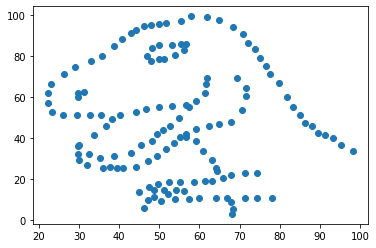

1 x_shape
상관계수 : -0.0656,  P-value : 0.4381


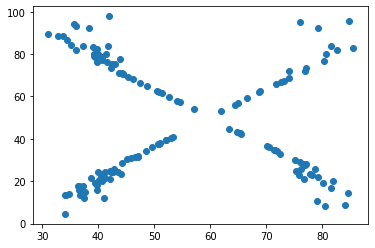

2 star
상관계수 : -0.0630,  P-value : 0.4566


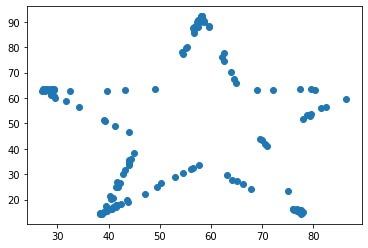

3 circle
상관계수 : -0.0683,  P-value : 0.4190


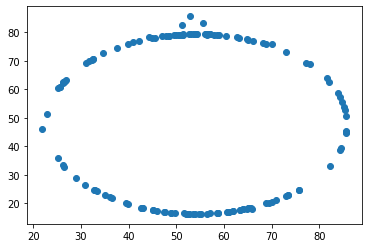

4 bullseye
상관계수 : -0.0686,  P-value : 0.4173


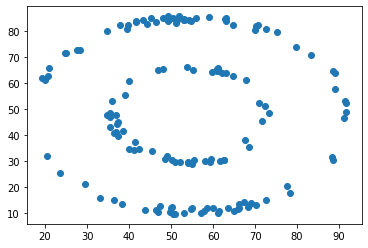

In [ ]:
for i,d in enumerate(ds_names) :
    temp_ds = ds.loc[ds['dataset']==d]
    corr = spst.pearsonr(temp_ds['x'], temp_ds['y'])
    print(i, d)
    print('상관계수 : {:.4f},  P-value : {:.4f}'.format(corr[0], corr[1]))
    plt.scatter(temp_ds['x'], temp_ds['y'])
    plt.show()

* 이렇듯, 수치화해서 하나의 숫자로 요약하는 데에는 많은 장점이 있습니다. 그러나 한계도 분명히 있음을 알아야 합니다.

----

# 9과 이변량_범주 vs 범주

<img src='https://github.com/DA4BAM/image/blob/main/%EC%9D%B4%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=700/>

## 1.환경준비

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [ ]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


## 2.교차표(pd.crosstab)

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.660991
1,0.553571,0.38961,0.339009


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.271930,0.087719,0.640351


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

Embarked,C,Q,S
Survived,,,
0,0.084175,0.05275,0.479237
1,0.104377,0.03367,0.245791


## 3.시각화
* 100% Stacked Bar
* mosaic

1) Pclass --> Survived

* 100% Stacked Bar
    * 먼저 crosstab으로 집계 : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


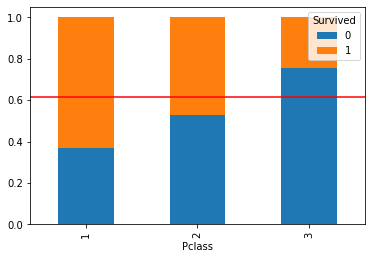

In [ ]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

비율만 비교하므로 양에 대한 비교는 할 수 없다!

* mosaic plot
    * mosaic(dataframe, [ feature, target])

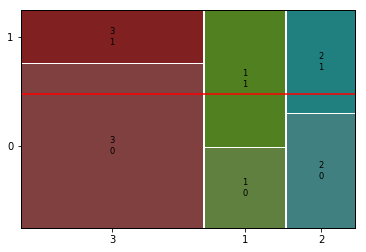

In [ ]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

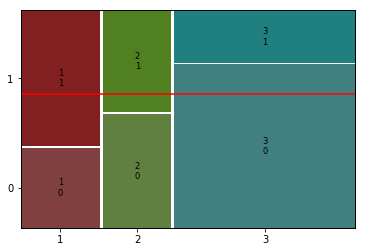

In [ ]:
# 저장된 값 순서대로 보여집니다. 
# 정렬하고 싶으면 .sort_values를 이용하면 됩니다.
# 사이 간격도 gap 옵션으로 조정 가능합니다.

mosaic(titanic.sort_values(['Pclass', 'Survived']), [ 'Pclass','Survived'], gap = 0.01)
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

### 실습
아래 관계에 대해서 교차표와 시각화(100% Stacked bar, mosaic)를 수행하고, feature와 target 간에 관계가 있는지 분석해 봅시다.


* Sex --> Survived

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


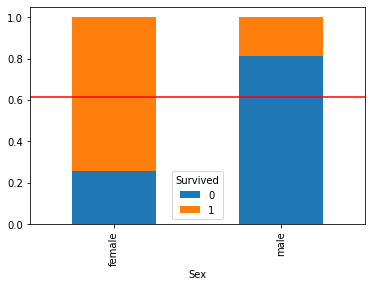

In [ ]:
temp = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

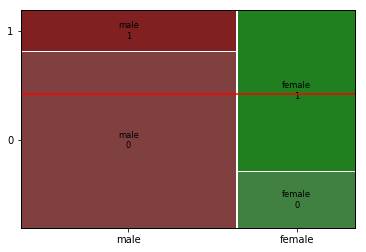

In [ ]:
mosaic(titanic, [ 'Sex','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* Embarked --> Survived

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009


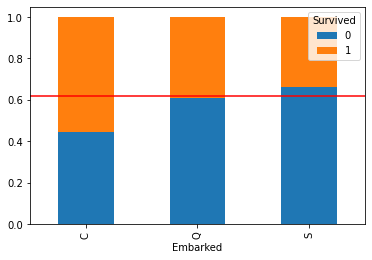

In [ ]:
temp = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

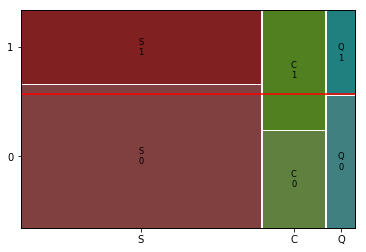

In [ ]:
mosaic(titanic, [ 'Embarked','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* Title --> Survived

Survived         0         1
Title                       
Master    0.439024  0.560976
Miss      0.297297  0.702703
Mr        0.839388  0.160612
Mrs       0.203125  0.796875
Others    0.785714  0.214286


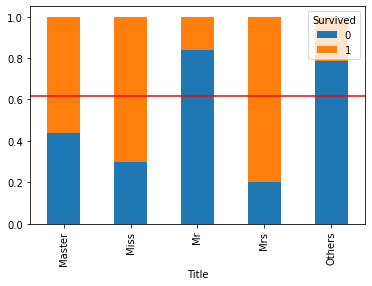

In [ ]:
temp = pd.crosstab(titanic['Title'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

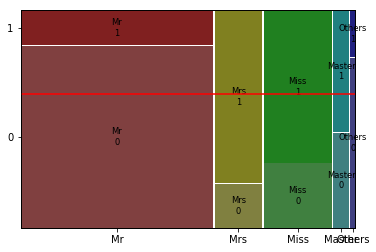

In [ ]:
mosaic(titanic, [ 'Title','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

3) 시각화 결과를 분석하는 방법  
* 한가지만 기억하세요!  귀무가설이 참일 때 나올 그래프의 모양(아래 그림)
* 여기서 벗어나면, 차이가 있다. 관련이 있다는 말입니다.



<img src='https://github.com/DA4BAM/image/blob/main/%EB%AA%A8%EC%9E%90%EC%9D%B5.png?raw=true' width=700/>

* [참조] 모자익 플롯을 3 범주로 그리려면...

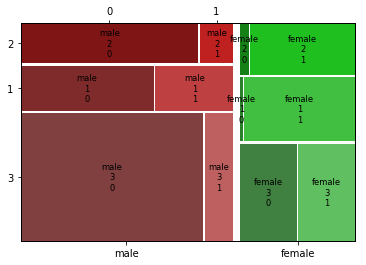

In [ ]:
# 세 범주로 그리려면...
mosaic(titanic, ['Sex','Pclass','Survived'], gap = 0.02)
plt.show()

## 4.수치화 : 카이제곱검정

* 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지, 수치화 하는 방법

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

* 카이 제곱 통계량은
    * 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    * 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    * 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 본다. 

* 범주형 변수의 자유도 : 범주의 수 - 1

* 카이제곱검정에서는
    * x 변수의 자유도 × y 변수의 자유도
    * 예 : Pclass --> Survived
        * Pclass : 범주가 3개, Survived : 2개
        * (3-1) * (2-1) = 2
        * 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면, 차이가 있다고 볼수 있음.


* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [ ]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [ ]:
result

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

### 실습
다음의 관계에 대해 수치화 해 봅시다.

* Sex --> Survived

In [ ]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Sex'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Sex       female  male
Survived              
0             81   468
1            233   109
----------------------------------------------------------------------------------------------------
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
기대빈도
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


* Embarked --> Survived

In [ ]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Embarked'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219
----------------------------------------------------------------------------------------------------
카이제곱통계량 25.964452881874784
p-value 2.3008626481449577e-06
기대빈도
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


* Title --> Survived

In [ ]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Title'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Title     Master  Miss   Mr  Mrs  Others
Survived                                
0             18    55  439   26      11
1             23   130   84  102       3
----------------------------------------------------------------------------------------------------
카이제곱통계량 289.1953165452417
p-value 2.318405007221846e-61
기대빈도
 [[ 25.26262626 113.98989899 322.25252525  78.86868687   8.62626263]
 [ 15.73737374  71.01010101 200.74747475  49.13131313   5.37373737]]


# 10과 이변량_범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [ ]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## 2.평균비교

### 평균

* 범주 ==> 숫자 의 관계를 살펴볼 때 중요한 관점은 ‘평균비교’ 입니다. 

* 평균을 비교할 때는 두 가지를 고려해야 합니다.
    * ① 평균값이 그 집단을 대표할 수 있는가?
    * ② 평균값이 믿을 만 한가?

### 1) 평균값이 그 집단을 대표할 수 있는가?

In [ ]:
s0 = titanic.loc[titanic['Survived']==0, 'Age']
s1 = titanic.loc[titanic['Survived']==1, 'Age']

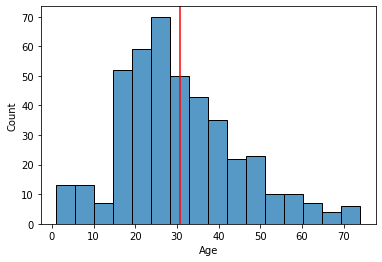

In [ ]:
# 사망자의 나이 분포
sns.histplot(s0, bins = 16)
plt.axvline(s0.mean(), color='r')
plt.show()

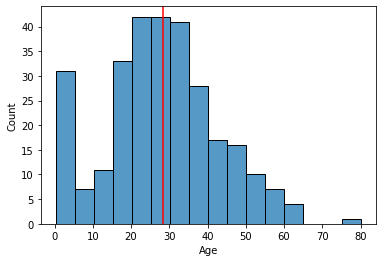

In [ ]:
# 생존자의 나이 분포
sns.histplot(s1, bins = 16)
plt.axvline(s1.mean(), color='r')
plt.show()

* 평균이 집단을 대표하지 못할때..

> 평균의 함정 : https://www.youtube.com/watch?v=Pp_Pd6GZLOE

In [ ]:
# 임의의 한 집단을 만들어 봅시다.
pop = [round(rd.normalvariate(10, 5),1) for i in range(1000)] + [round(rd.normalvariate(38, 8),1) for i in range(750)]
mn = np.mean(pop)
print(mn)

21.934514285714286


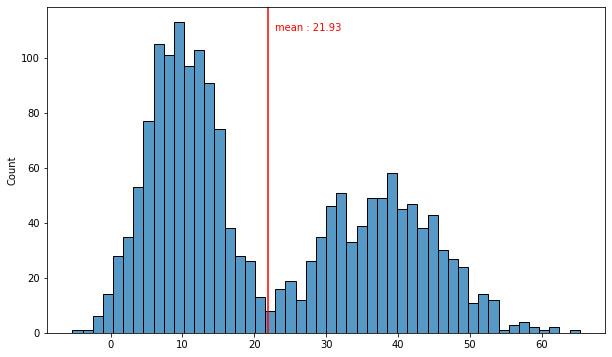

In [ ]:
# 히스토그램으로 집단의 대표값이 될 수 있는지 살펴봅시다.
plt.figure(figsize=(10,6))
sns.histplot(pop, bins = 50)
plt.axvline(mn, color='r')
plt.text(mn+1, 110, "mean : {}".format(round(mn,2)), color = 'r')
plt.show()

### 2) 평균값을 믿을 만 한가?

* 표본 조사를 수행하기로 결정하였을 때,다음 두가지 조사의 오차에 대해서 생각해 봅시다.
    * 조사1 : 전국 성인 10명을 무작위로 뽑아서, 키를 재고 그 평균을 계산했더니 174 cm
    * 조사2 : 전국 성인 1000명을 무작위로 뽑아서, 키를 재고 그 평균을 계산했더니 166 cm

* 어떤 조사 결과가 전국 성인의 평균키와 더 가까울 까요? 어떤 조사 결과가 **오차**가 더 적을 까요?

* 평균이 믿을만 한지는 오차로 평가해야 합니다.
    * 표준편차
    * 표준오차

### 3) 표준편차(SD, Standard Deviation)
* 한 집단을 설명하기 위해서
* 그 집단 안에서 대푯값으로 평균을 구할 때
* 값들이 평균으로부터 얼마나 벗어나 있는지(이탈도, deviation)를 나타내는 값.
    * 예 : 우리 반 수학 성적의 평균이 91, 표준편차는 10

In [ ]:
a = np.array([23,54,47,64,29,15])

print(f'평균 : {a.mean()}')
print(f'표준편차 : {a.std()}')

평균 : 38.666666666666664
표준편차 : 17.53726191728787


평균 38.6, 표준편차 17.5는 집단 a를 설명(대표)하는 숫자 입니다.

In [ ]:
# 표준편차
titanic.groupby('Survived')['Age'].agg(['mean','std'])

,mean,std
Survived,,
0,30.626179,14.172110
1,28.343690,14.950952


### 4) 표준오차(SE, standard error)
* 표준오차는 표준편차와 다른 개념입니다. (표준 편차와 비교하는 개념이 아닙니다!)
* 우선 **표본(의) 평균**을 이해해야 합니다.
* 표본을 뽑아내는(표집, sampling) 목적은, 모집단을 추정하기 위함 입니다.
    * 표본평균을 계산한다는 의미는, 표본의 평균으로 모집단의 평균을 **추정**하기 위함 입니다.(**추정치**)
    * 표본의 평균을 계산하면, 표본 자체의 평균이라는 의미가 아니라, 모평균을 표본으로 추정한 평균치 입니다.
    * 그래서 표본평균 하면 항상 모평균을 의식해야 합니다.
* 그런데 표본평균은 모평균과 완전히 일치할 수는 없습니다. 
* 이 오차를 **표준오차** 라고 합니다.

* 표준오차 공식 : 𝑠/√𝑛
    * 샘플의 표준 편차 : s
    * 데이터 건수 : n
* 표준 오차로 부터 신뢰구간을 계산하게 됩니다.

* 몇가지 기호에 대해서  

<img src='https://github.com/DA4BAM/image/blob/main/%EA%B8%B0%ED%98%B8.png?raw=true' width=500/>

In [ ]:
# 표준오차
titanic.groupby('Survived')['Age'].agg(['mean','std','sem'])

,mean,std,sem
Survived,,,
0,30.626179,14.172110,0.688258
1,28.343690,14.950952,0.877950


### 5) 95% 신뢰구간

* 모집단을 하나 준비합니다.

In [ ]:
# 임의의 모집단을 하나 만듭시다.
pop2 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]

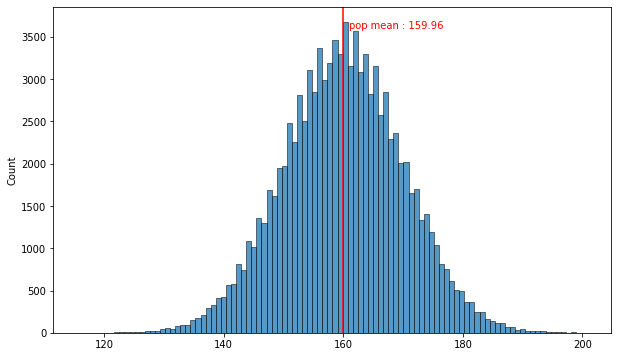

In [ ]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다. (보고 나서 못 본 것으로 합시다.ㅎㅎ)

plt.figure(figsize=(10,6))
sns.histplot(pop2, bins = 100)
plt.axvline(np.mean(pop2), color = 'r')
plt.text(np.mean(pop2)+1, 3600, f'pop mean : {np.mean(pop2).round(2)}', color = 'r')
plt.show()

* 표본 조사를 합니다. 
    * 100명을 임의로 샘플링 해서 
    * 표본의 평균과, 표준 오차, 신뢰구간을 계산해 봅시다.

In [ ]:
# 표본조사를 합니다. 100건
s1 = rd.sample(pop2,100)
s1 = pd.Series(s1)
s1.mean(), s1.std(), s1.sem()

(162.528, 9.912557895942095, 0.9912557895942096)

In [ ]:
1.96 * s1.sem()

1.9428613476046508

In [ ]:
# 95% 신뢰구간
s1.mean() - (1.96 * s1.sem()), s1.mean() + (1.96 * s1.sem())

(160.58513865239533, 164.47086134760465)

* 표본평균의 신뢰구간과 모평균을 비교해 봅시다.

In [ ]:
# 모평균은?
np.mean(pop2)

159.96253

* 95% 신뢰구간에 대한 실험을 해 봅시다.
    * 샘플조사를 100번 수행합니다.
    * 그때마다 신뢰구간을 계산한 후
    * 그 중 몇번이 모평균을 포함하는지 확인해 봅시다.
    * 95% 신뢰구간이라면, 100번 중 95번은 모평균을 포함해야 합니다.

In [ ]:
# 100번 샘플링
samples = { 'id' : [], 'value' : []}
for i in range(100) :
    samples['id'] += [i]* 100
    samples['value'] += rd.sample(pop2,100)

samples = pd.DataFrame(samples)
samples.shape

(10000, 2)

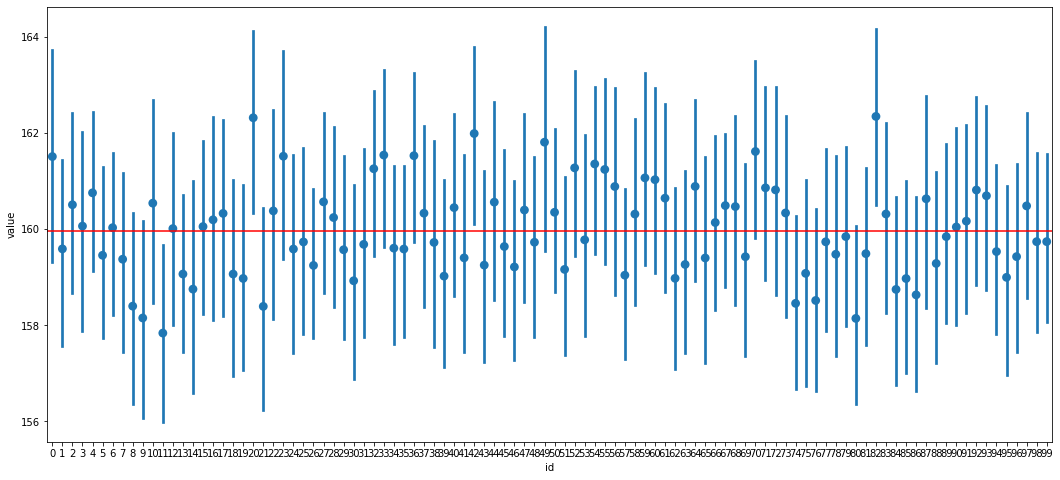

In [ ]:
# errorbar 라는 차트 입니다. 
# 신뢰구간, 표준오차 구간을 시각화 하는 방법입니다.

plt.figure(figsize = (18, 8))
sns.pointplot(x = 'id', y = 'value', data = samples, join = False)
plt.axhline(np.mean(pop2), color = 'r')
plt.show()

위 그래프에 대한 해석
* x축은 100번 시도에 대한 순번(인덱스)
* y축은 모평균(빨간 선)을 추정하기 위한 샘플의 평균과, 신뢰구간 표시

### (참조) 중심극한 정리

* 표본이 클수록 표집분포는 정규분포에 가까와 진다.


* 임의의 모집단을 하나 만듭니다.

In [ ]:
pop = [round(rd.expovariate(.3)+165,2) for i in range(10001)]

* ① 모집단으로 부터 데이터 n개 짜리 표본을 뽑아 표본평균을 계산합니다.
* ② ①번 작업을 m번 반복하여 얻은 표본평균 m개로 분포를 그려봅니다.

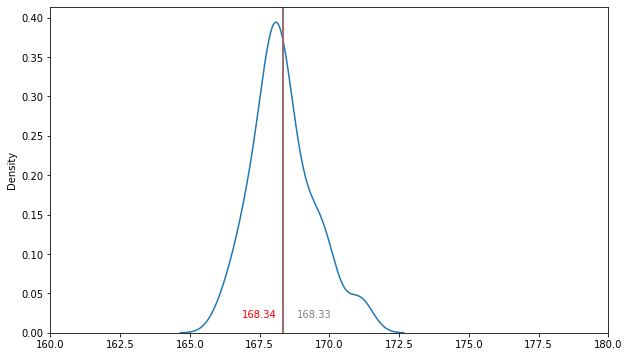

In [ ]:
# 표본의 크기
n = 10

# 표본의 갯수
m = 100

sample_mean = [np.mean(rd.sample(pop,n)) for i in range(m)]

plt.figure(figsize=(10,6))
sns.kdeplot(sample_mean)
plt.xlim(160,180)

plt.axvline(x=np.mean(sample_mean), color = 'red') #표본평균들의 평균
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균

plt.text(np.mean(sample_mean)-1.5, 0.02, round(np.mean(sample_mean),2), color = 'red') #표본평균들의 평균
plt.text(np.mean(pop)+.5,0.02, round(np.mean(pop),2), color = 'grey') #모평균

plt.show() # show

* 그렇다면, 모집단은 어떤 분포일까?


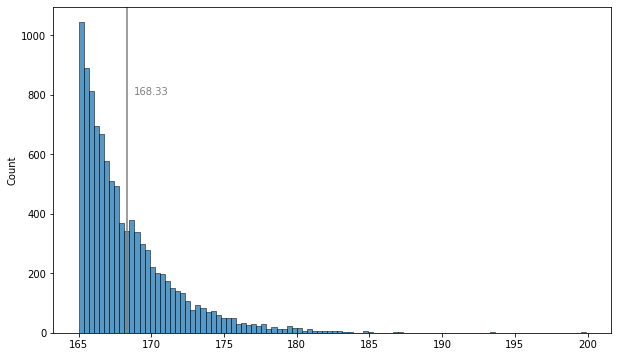

In [ ]:
plt.figure(figsize=(10,6)) #설정
sns.histplot(pop, bins = 100)
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균
plt.text(np.mean(pop)+.5, 800, round(np.mean(pop),2), color = 'grey')
plt.show() 

## 3.범주 --> 숫자

titanic data에서 Age를 Y로 두고 비교해 봅시다.

### 1) 시각화 : 평균 비교 barplot, boxplot 

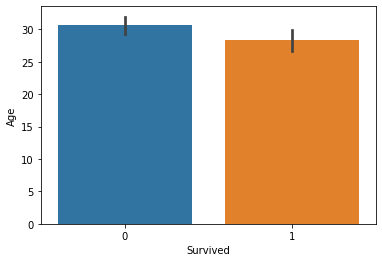

In [ ]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x="Survived", y="Age", data=titanic)
plt.show()

위 두 범주간에 평균에 차이가 있나요?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


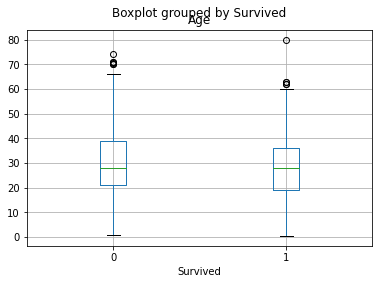

In [ ]:
# 박스플롯으로 비교해 봅시다.
titanic.boxplot('Age', 'Survived')
plt.show()

### 2)수치화 : t-test(두 범주), anova(세 범주 이상)

#### ①t-test
두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다. 
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.

* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.

* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다. 
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다. 

In [ ]:
import scipy.stats as spst
import numpy as np
import random as rd


In [ ]:
# 모집단 만들기
pop1 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]
pop2 = [round(rd.normalvariate(170, 10),1) for i in range(100000)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


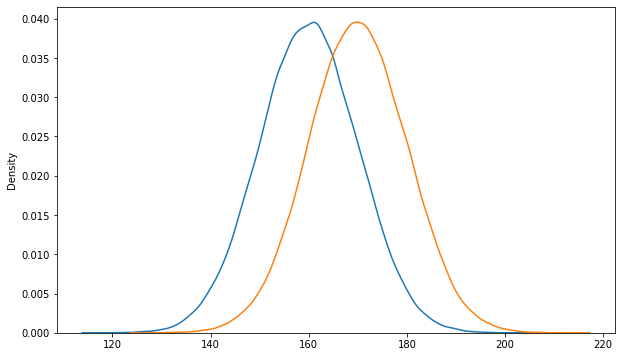

In [ ]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다.
plt.figure(figsize=(10,6))
sns.distplot(pop1, hist=False, kde=True)
sns.distplot(pop2, hist=False, kde=True)
plt.show()

In [ ]:
# 표본을 추출합니다. 먼저 pop1으로 부터 두 샘플을 추출합시다.
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop1,100)


In [ ]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=-0.2879563285738738, pvalue=0.7736813563506695)

p.value의 의미는?

In [ ]:
# 이번에는 두 모집단으로 부터 각각 샘플링
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop2,100)

In [ ]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=-8.750811699106892, pvalue=9.269270457682245e-16)

p.value의 의미는?

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


In [ ]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
temp = titanic.loc[titanic['Age'].notnull()]
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

In [ ]:
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

#### 실습 : t-test

성별에 따라 운임에 차이가 있을 것이다.

In [ ]:
male = titanic.loc[titanic['Sex'] == 'male', 'Fare']
female = titanic.loc[titanic['Sex'] == 'female', 'Fare']


In [ ]:
male

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
883    10.5000
884     7.0500
886    13.0000
889    30.0000
890     7.7500
Name: Fare, Length: 577, dtype: float64

In [ ]:
spst.ttest_ind(male, female)

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

#### ②anova

* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 = 
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

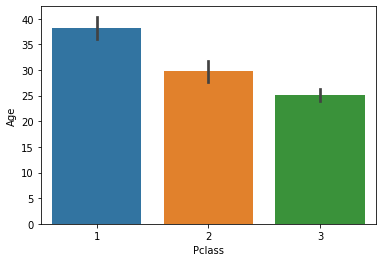

In [ ]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


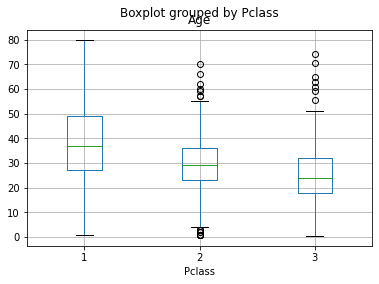

In [ ]:
titanic.boxplot('Age', 'Pclass')
plt.show()

In [ ]:
P_1 = titanic.loc[titanic.Pclass == 1, 'Age']
P_2 = titanic.loc[titanic.Pclass == 2, 'Age']
P_3 = titanic.loc[titanic.Pclass == 3, 'Age']

In [ ]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=nan, pvalue=nan)


#### 실습 ANOVA

승선지역(Embarked)별로 운임에 차이가 있을 것이다.
* 시각화와 수치화로 확인해 봅시다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


전체평균 : 32.2042079685746


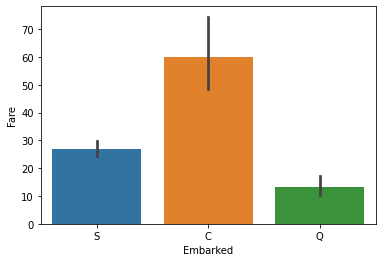

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)


In [ ]:
# 전체 평균
print('전체평균 : {}'.format(titanic.Fare.mean()))

# sns.barplot()
sns.barplot("Embarked","Fare", data = titanic)
plt.show()

# spst.f_oneway()
s = titanic.loc[ titanic.Embarked == 'S', 'Fare']
c = titanic.loc[ titanic.Embarked == 'C', 'Fare']
q = titanic.loc[ titanic.Embarked == 'Q', 'Fare']

print(spst.f_oneway(s,c,q))

In [ ]:
# spst.f_oneway()
print(spst.f_oneway(s,c,q))

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)


# 11과 이변량_숫자 vs 범주

## 1.환경준비

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 직원 이직 분석


In [ ]:
# 타이타닉 데이터
titanic = pd.read_csv('https://bit.ly/3HaMAtZ')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family,Age_scale1
0,0,3,male,22.0,1,0,7.2500,S,Age21_30,2,0.271174
1,1,1,female,38.0,1,0,71.2833,C,Age31_40,2,0.472229
2,1,3,female,26.0,0,0,7.9250,S,Age21_30,1,0.321438
3,1,1,female,35.0,1,0,53.1000,S,Age31_40,2,0.434531
4,0,3,male,35.0,0,0,8.0500,S,Age31_40,1,0.434531


## 2.시각화

* 히스토그램을 Survived로 나눠서 그려봅시다.

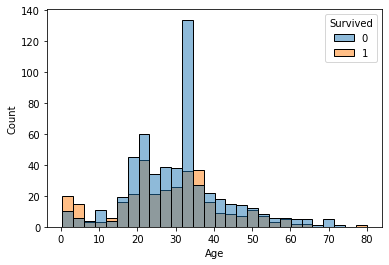

In [ ]:
sns.histplot(x='Age', data = titanic, hue = 'Survived')
plt.show()

* kdeplot을 그려봅시다.  
* 두가지 방법이 있습니다.
    * ① kdeplot(   , hue = 'Survived) 
        * 생존여부의 비율이 유지된 채로 그려짐
        * 두 그래프의 아래 면적의 합이 1
    * ② kdeplot(   , hue = 'Survived, common_norm = False)
        * 생존여부 각각 아래 면적의 합이 1인 그래프
    * ③ kdeplot(   , hue = 'Survived, multiple = 'fill')
        * 나이에 따라 생존여부 **비율**을 비교해볼 수 있음. (양의 비교가 아닌 비율!)


① kdeplot( , hue = 'Survived)

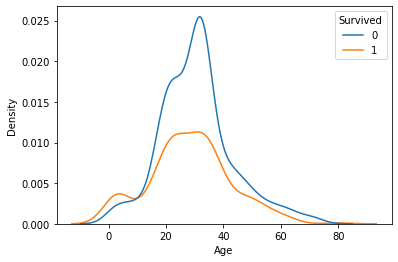

In [ ]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived')
plt.show()

② kdeplot( , hue = 'Survived, common_norm = False)

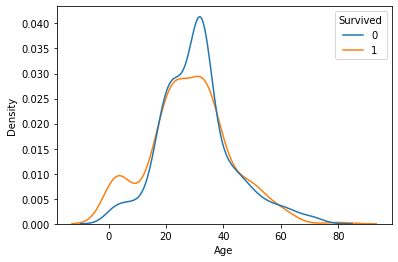

In [ ]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived', common_norm = False)
plt.show()

③ multiple = 'fill' 옵션

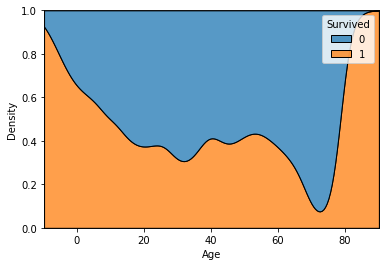

In [ ]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

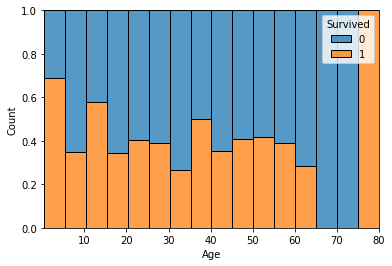

In [ ]:
sns.histplot(x='Age', data = titanic, bins = 16
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

### 연습

* Fare --> Survived : 히스토그램과 밀도함수 그래프로 시각화 해 봅시다.

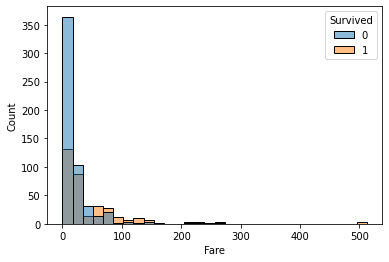

In [ ]:
sns.histplot(x='Fare', bins = 30, data = titanic, hue = 'Survived')
plt.show()

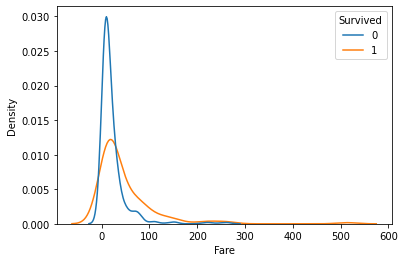

In [ ]:
sns.kdeplot(x='Fare', data = titanic, hue ='Survived', common_norm = False)
plt.show()

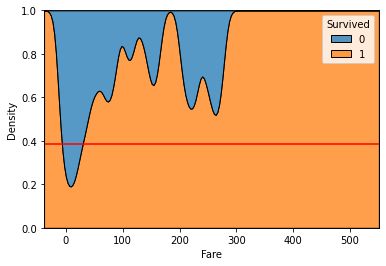

In [ ]:
sns.kdeplot(x='Fare', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

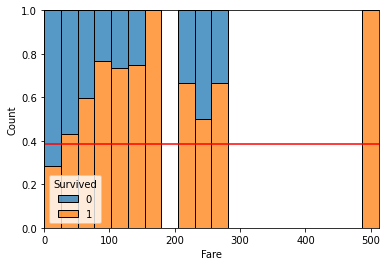

In [ ]:
sns.histplot(x='Fare', data = titanic, bins = 20
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

## 3.수치화 : 로지스틱 회귀 모델로 부터 p value 구하기

숫자 --> 범주에 대해 딱 맞는 가설검정 도구가 없으므로, 로지스틱 회귀 모델로 부터 p-value를 구해봅시다.

In [ ]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(titanic['Survived'], titanic['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.661967
         Iterations 4
Age    3.932980e-13
dtype: float64


### 연습

* Fare --> Survived : 로지스틱회귀로 부터 p-value를 구해 봅시다.

In [ ]:
model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64
